## Item 1 - Valores IDEB - 2023

Geração de conjunto de Dados IDEB. Optou-se por usar os dados reais do IDEB de 2023.  

* Valor: 2 pontos
 * Desenvolver um algoritmo para exibição de gráficos coropléticos dos municípios do Espírito Santo (ES), utilizando dados de IDEB de 2023.
* Etapas:
    1. Ler um conjunto de dados de IDEB para os municípios do Espírito Santo, com os respectivos códigos de município.
    2. O DataFrame gerado deve conter:
        - o cod_mun (código do município),
        - o ideb_ano (valor simulado do IDEB)
    3. Imprir as 5 primeiras linhas da tabela

### Imports

In [1]:
import pandas as pd
import numpy as np
import random
import os
import janitor # Para limpar nomes das colunas
import matplotlib.pyplot as plt

### Leitura dos nomes e códigos dos municípios do Espírito Santo

Os dados com o IDEB de 2023 foram obtidos no site do INEP, neste [link](https://www.gov.br/inep/pt-br/areas-de-atuacao/pesquisas-estatisticas-e-indicadores/ideb/resultados), e filtrados para selecionar apenas os dados dos municípios do Espírito Santo, para a rede estadual e do ano de 2023.

In [2]:
path_ideb = r'../../../datasets/ideb_2023_ensino_medio_municipios_ES.xlsx'
ideb = pd.read_excel(path_ideb)

# padronizando nomes das colunas
ideb = janitor.clean_names(ideb)

# Garantir que a colunas com os código do município seja uma string
ideb['codigo_municipio'] = ideb['codigo_municipio'].astype('string')

ideb.sample(5)

,codigo_municipio,nome_municipio,ideb
8,3200607,Aracruz,4.7
40,3203130,João Neiva,4.9
21,3201803,Divino de São Lourenço,4.9
24,3202108,Ecoporanga,4.1
27,3202306,Guaçuí,5.1


### Leitura dos dados geoprocessados

In [3]:
import geopandas as gpd

In [4]:
path_file = r'../../../datasets/municipios_es/ES_Municipios_2024.shp'
df_municipios_geometria = gpd.read_file(path_file)

# Padronizando nome das colunas
df_municipios_geometria = janitor.clean_names(df_municipios_geometria)

# Garantir que a colunas com os código do município seja uma string
df_municipios_geometria['cd_mun'] = df_municipios_geometria['cd_mun']\
    .astype('string')

df_municipios_geometria.head()

C:\Users\sandr\miniconda3\Lib\site-packages\pyogrio\core.py:35: RuntimeWarning: Could not detect GDAL data files.  Set GDAL_DATA environment variable to the correct path.
  _init_gdal_data()


,cd_mun,nm_mun,cd_rgi,nm_rgi,cd_rgint,nm_rgint,cd_uf,nm_uf,sigla_uf,cd_regia,nm_regia,sigla_rg,cd_concu,nm_concu,area_km2,geometry
0,3200409,Anchieta,320001,Vitória,3201,Vitória,32,Espírito Santo,ES,3,Sudeste,SE,None,None,409.691,"MULTIPOLYGON (((-40.68438 -20.82728, -40.68428..."
1,3203502,Montanha,320003,São Mateus,3202,São Mateus,32,Espírito Santo,ES,3,Sudeste,SE,None,None,1099.060,"POLYGON ((-40.34393 -18.28299, -40.34397 -18.2..."
2,3202207,Fundão,320001,Vitória,3201,Vitória,32,Espírito Santo,ES,3,Sudeste,SE,3205309,Vitória/ES,286.854,"POLYGON ((-40.19506 -20.03569, -40.19545 -20.0..."
3,3202256,Governador Lindenberg,320005,Colatina,3203,Colatina,32,Espírito Santo,ES,3,Sudeste,SE,None,None,360.016,"POLYGON ((-40.49596 -19.11354, -40.49529 -19.1..."
4,3204807,São José do Calçado,320008,Alegre,3204,Cachoeiro do Itapemirim,32,Espírito Santo,ES,3,Sudeste,SE,None,None,273.489,"POLYGON ((-41.62823 -20.86183, -41.62814 -20.8..."


In [5]:
len(df_municipios_geometria)

78

### Mesclar os dados com as geometrias e os dados simulados do IDEB

Juntar aos dados dos muncípios com as geometrias, os dados do IDEB, por meio dos códigos dos municípios.

In [6]:
df_municipios_geometria_ideb = df_municipios_geometria\
    .merge(ideb, how='left',left_on='cd_mun', right_on='codigo_municipio')

df_municipios_geometria_ideb.head()

,cd_mun,nm_mun,cd_rgi,nm_rgi,cd_rgint,nm_rgint,cd_uf,nm_uf,sigla_uf,cd_regia,nm_regia,sigla_rg,cd_concu,nm_concu,area_km2,geometry,codigo_municipio,nome_municipio,ideb
0,3200409,Anchieta,320001,Vitória,3201,Vitória,32,Espírito Santo,ES,3,Sudeste,SE,None,None,409.691,"MULTIPOLYGON (((-40.68438 -20.82728, -40.68428...",3200409,Anchieta,5.2
1,3203502,Montanha,320003,São Mateus,3202,São Mateus,32,Espírito Santo,ES,3,Sudeste,SE,None,None,1099.060,"POLYGON ((-40.34393 -18.28299, -40.34397 -18.2...",3203502,Montanha,4.5
2,3202207,Fundão,320001,Vitória,3201,Vitória,32,Espírito Santo,ES,3,Sudeste,SE,3205309,Vitória/ES,286.854,"POLYGON ((-40.19506 -20.03569, -40.19545 -20.0...",3202207,Fundão,4.7
3,3202256,Governador Lindenberg,320005,Colatina,3203,Colatina,32,Espírito Santo,ES,3,Sudeste,SE,None,None,360.016,"POLYGON ((-40.49596 -19.11354, -40.49529 -19.1...",3202256,Governador Lindenberg,4.7
4,3204807,São José do Calçado,320008,Alegre,3204,Cachoeiro do Itapemirim,32,Espírito Santo,ES,3,Sudeste,SE,None,None,273.489,"POLYGON ((-41.62823 -20.86183, -41.62814 -20.8...",3204807,São José do Calçado,4.2


## Item 2 - Mapa Coroplético 

Gerar um mapa coroplético dos municípios do Espírito Santo, com os valores médios do IDEB de cada município.

### Plotar o gráfico

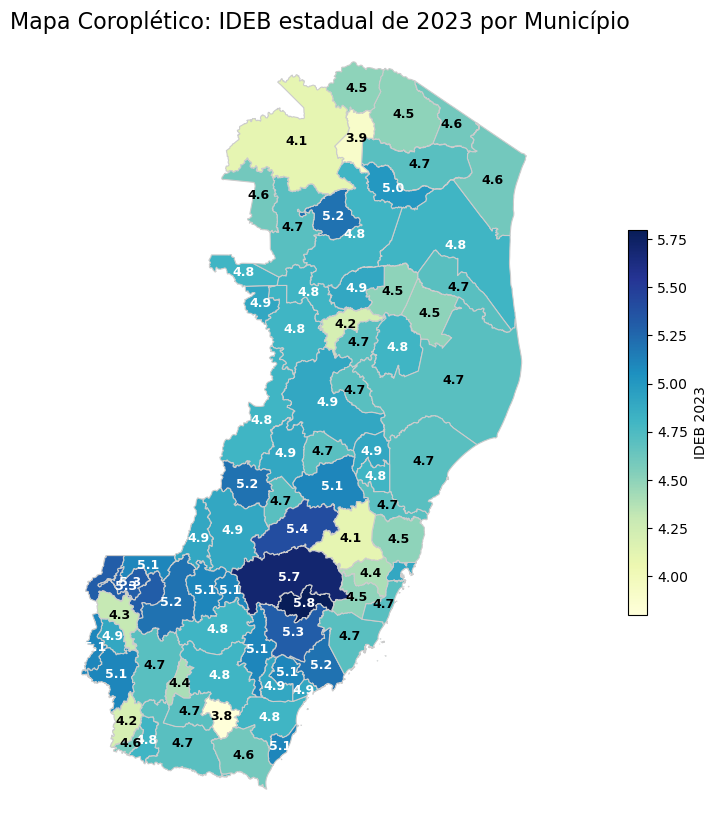

In [7]:
# Garantindo uma cópia do dataframe
mapa_ideb = df_municipios_geometria_ideb.copy()

# Reprojetar para um CRS adequado (em metros) para 
# calcular o centróide com precisão
mapa_ideb_proj = mapa_ideb.to_crs(epsg=5880)
mapa_ideb['centroide'] = mapa_ideb_proj.centroid.to_crs(mapa_ideb.crs)

# Plotar o mapa 
fig, ax = plt.subplots(figsize=(10, 10))
mapa_ideb.plot(column="ideb", cmap="YlGnBu", linewidth=0.8,\
               edgecolor='0.8', legend=True, \
               legend_kwds={'label': "IDEB 2023", 'shrink': 0.5},\
               ax=ax)

# Usar média como limiar para trocar cor do texto
limiar = mapa_ideb['ideb'].mean()

for idx, row in mapa_ideb.iterrows():
    x = row['centroide'].x
    y = row['centroide'].y
    valor = row['ideb']

    cor_texto = 'white' if valor > limiar else 'black'

    ax.text(x, y, f"{valor:.1f}", fontsize=9, ha='center', va='center',
            color=cor_texto, weight='bold')

# Limitar visualização (x = longitude, y = latitude)
ax.set_xlim(-42.034520, -39.351673)
ax.set_ylim(-21.385750, -17.775498)

ax.set_title("Mapa Coroplético: IDEB estadual de 2023 por Município",\
             fontsize=16)
ax.axis("off")

plt.savefig('../../figuras/mapa_ideb_2023.png', format='png')
plt.show()

#### Avalidando alguns valores de destaque

Listando os nomes e IDEBs dos municípios

In [8]:
df = mapa_ideb[['nome_municipio', 'ideb']].copy()

# Dividir em blocos de 26 linhas (para 2 colunas)
n_colunas = 2
n_linhas = int(np.ceil(len(df) / n_colunas))

# Preencher com NaN se necessário
df_preenchido = df.reindex(range(n_linhas * n_colunas))

# Separar os dados em colunas
colunas_combinadas = []
for i in range(n_colunas):
    bloco = df_preenchido.iloc[i*n_linhas:(i+1)*n_linhas]\
    .reset_index(drop=True)
    bloco.columns = [f'nome_municipio_{i+1}', f'ideb_{i+1}']
    colunas_combinadas.append(bloco)

# Concatenar os blocos lado a lado
df_formatado = pd.concat(colunas_combinadas, axis=1)

# Exibir o novo DataFrame
print(df_formatado)

           nome_municipio_1  ideb_1         nome_municipio_2  ideb_2
0                  Anchieta     5.2                     Iúna     5.3
1                  Montanha     4.5                  Jaguaré     4.7
2                    Fundão     4.7             Baixo Guandu     4.8
3     Governador Lindenberg     4.7              Rio Bananal     4.8
4       São José do Calçado     4.2                   Iconha     5.1
5    Divino de São Lourenço     4.9                Cariacica     4.4
6                    Pancas     4.8                    Irupi     5.3
7                   Vitória     4.9             Nova Venécia     4.8
8                    Apiacá     4.8        Jerônimo Monteiro     4.4
9                    Guaçuí     5.1               João Neiva     4.9
10            Pedro Canário     4.6          Rio Novo do Sul     4.9
11                 Mucurici     4.5         Laranja da Terra     5.2
12            Boa Esperança     5.0   Barra de São Francisco     4.7
13               São Mateus     4.

#### Valor médio dos IDEB 2023 para o Espírito Santo

In [9]:
mapa_ideb['ideb'].mean()

np.float64(4.793589743589744)

#### Maiores e menores valores do IDEB de 2023

In [10]:
# Top 5 municípios com os maiores valores de IDEB
maiores_ideb = mapa_ideb[['nome_municipio', 'ideb']]\
    .sort_values(by='ideb', ascending=False).head(5)

# Top 5 municípios com os menores valores de IDEB
menores_ideb = mapa_ideb[['nome_municipio', 'ideb']]\
    .sort_values(by='ideb', ascending=True).head(5)

print("Municípios com os MAIORES valores de IDEB:")
print(maiores_ideb)

print("\nMunicípios com os MENORES valores de IDEB:")
print(menores_ideb)

Municípios com os MAIORES valores de IDEB:
           nome_municipio  ideb
23      Marechal Floriano   5.8
59       Domingos Martins   5.7
60  Santa Maria de Jetibá   5.4
45                  Irupi   5.3
33         Alfredo Chaves   5.3

Municípios com os MENORES valores de IDEB:
         nome_municipio  ideb
69      Atílio Vivácqua   3.8
72           Ponto Belo   3.9
58     Santa Leopoldina   4.1
35           Ecoporanga   4.1
4   São José do Calçado   4.2


## Item 3 - Interpretação 

* Valor: 2 pontos 

Com base no gráfico gerado, comente brevemente (até 5 linhas) sobre o que foi observado

----

O mapa revela que a maioria dos municípios capixabas apresenta valores médios de IDEB. Destacam-se positivamente municípios da região serrana e ao Sul do estado, como por exemplo Marechal Floriano (5,8) e Domingos Martins (5,7), com os maiores índices. Considerando que a [média do IDEB nacional em 2023](https://qedu.org.br/brasil/ideb) foi (4,1), a média capixaba está acima deste valor (4,8). Em contraste, Atílio Vivácqua (3,8) e Ponto Belo (3,9) estão entre os piores resultados, estando inclusive abaixo da média nacional para o ano em questão. O contraste é maior para Atílio Viváqua pois o município está justamente ao Sul do Estado. Essa variação indica desigualdades regionais na qualidade da educação. A análise pode orientar políticas públicas mais direcionadas.